<a href="https://colab.research.google.com/github/ThomasDsl/EEIGM/blob/main/Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Entraînement

In [61]:
!rm -rf EEIGM

In [62]:
!git clone https://github.com/ThomasDsl/EEIGM
!git pull origin

Cloning into 'EEIGM'...
remote: Enumerating objects: 58, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 58 (delta 21), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (58/58), 26.47 MiB | 12.09 MiB/s, done.
Resolving deltas: 100% (21/21), done.
Already up to date.


/tmp/ipython-input-79547475.py:7: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.imshow(IP) # visualize image using imshow function
/tmp/ipython-input-79547475.py:8: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.show()


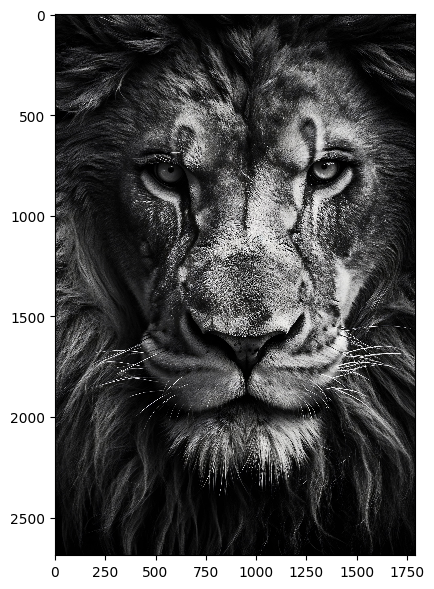

In [32]:
import skimage as sk # load skimage libraries
from skimage import io
IP = sk.io.imread('/content/EEIGM/lion.jpg') # read image using imread function

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
sk.io.imshow(IP) # visualize image using imshow function
sk.io.show()

In [8]:
#j'importe image
from google.colab import files # load skimage libraries
import io
uploaded = files.upload()

Saving yves_granjon.jpg to yves_granjon.jpg


In [40]:
import skimage as sk # load skimage libraries
from skimage import io
I2 = sk.io.imread('yves_granjon.jpg') # read image using imread function

/tmp/ipython-input-3713951142.py:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.imshow(I2) # visualize image using imshow function
/tmp/ipython-input-3713951142.py:4: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.show()


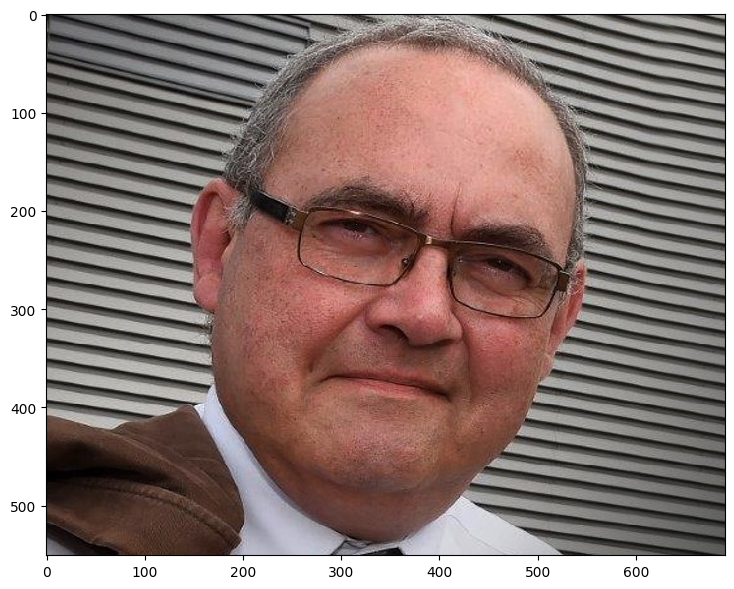

In [39]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
sk.io.imshow(I2) # visualize image using imshow function
sk.io.show()

In [41]:
IG = sk.color.rgb2gray(I2)
IG_uint8 = (IG * 255).astype(np.uint8)

In [42]:
IG_uint8.shape

(551, 691)

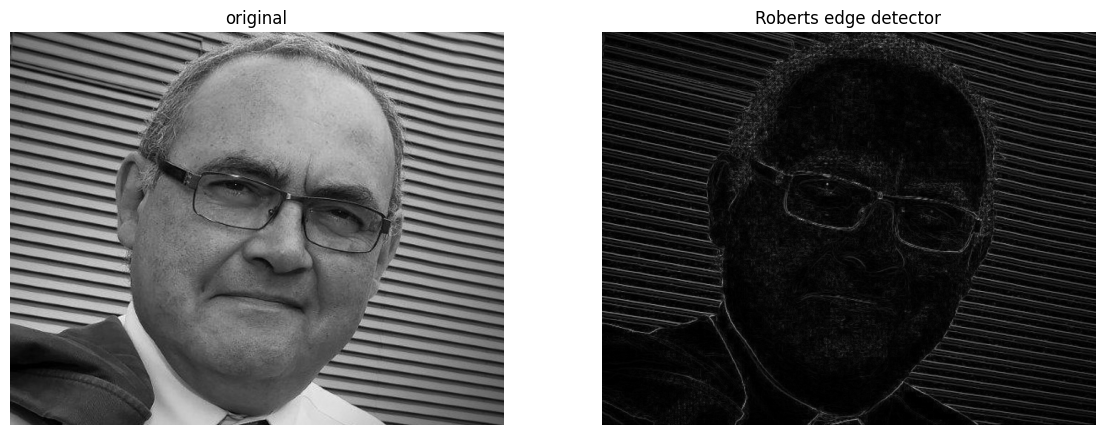

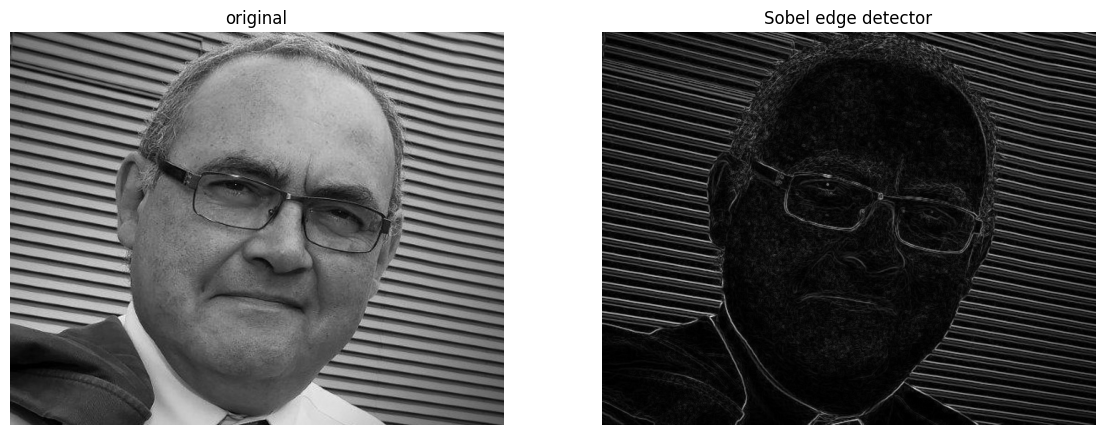

In [50]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.data import camera
from skimage.filters import roberts, sobel
def plot_comparison(original, filtered, filter_name):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 6), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')

image = camera()

edge_roberts = roberts(IG_uint8)
plot_comparison(IG_uint8,edge_roberts, 'Roberts edge detector')
plt.savefig('roberts_edges.png')

edge_sobel = sobel(IG_uint8)
plot_comparison(IG_uint8,edge_sobel, 'Sobel edge detector')

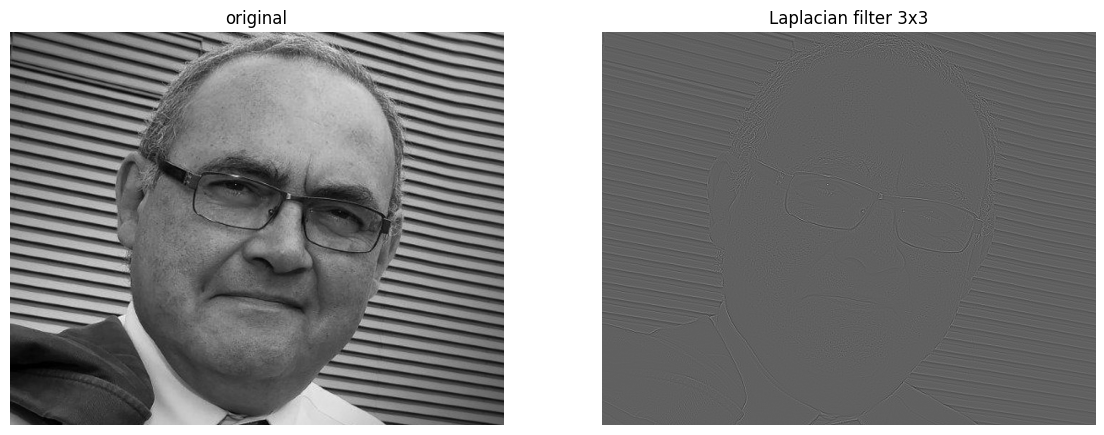

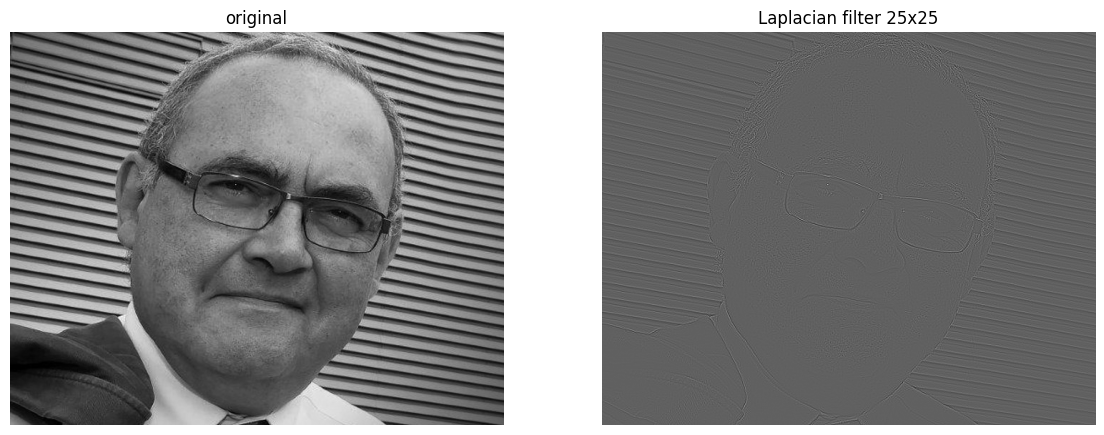

In [52]:


from skimage import data
from skimage.filters import laplace
from skimage.color import rgb2gray

img_f = laplace(IG_uint8, 3)
plot_comparison(IG_uint8,img_f, 'Laplacian filter 3x3')
plt.savefig('laplacian.png')

img_f = laplace(IG_uint8, 25)
plot_comparison(IG_uint8,img_f, 'Laplacian filter 25x25')



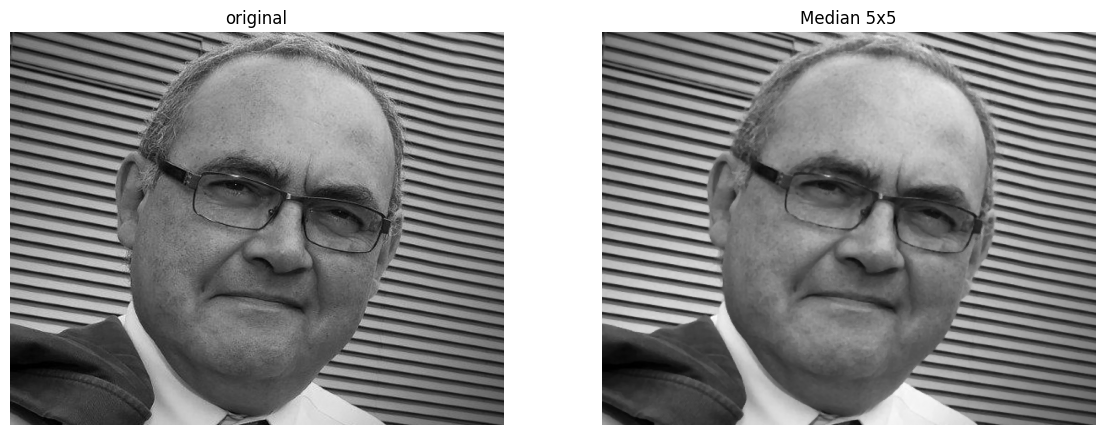

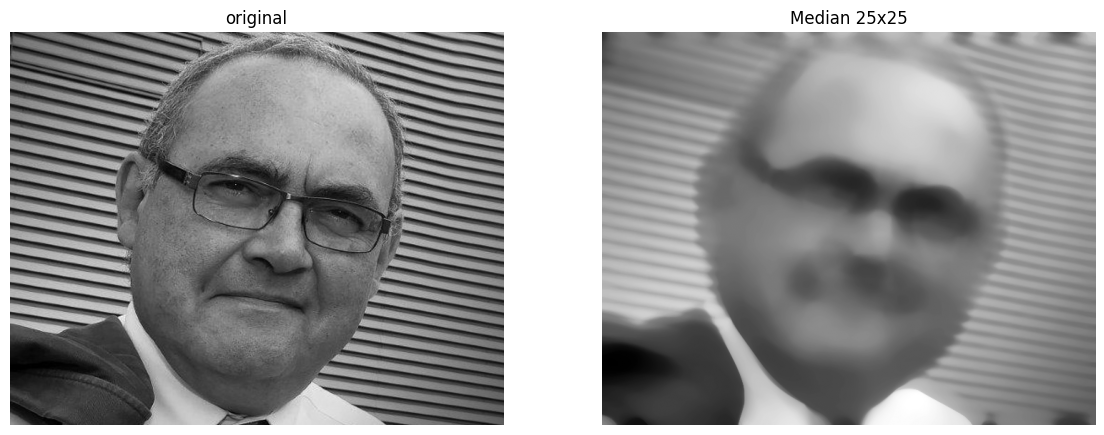

In [51]:

from skimage.morphology import disk
from skimage.filters import median


sel5 = disk(2) # structuring element disk radius 5 pixels
img_med5x5 = median(IG_uint8, sel5)
plot_comparison(IG_uint8,img_med5x5,'Median 5x5')
plt.savefig('median.png')

sel25 = disk(25)
img_med25x25 = median(IG_uint8, sel25)
plot_comparison(IG_uint8,img_med25x25,'Median 25x25')

In [ ]:
import skimage as sk # load skimage libraries
from skimage import io
IP = sk.io.imread('/content/EEIGM/lion.jpg') # read image using imread function

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
sk.io.imshow(IP) # visualize image using imshow function
sk.io.show()

In [ ]:

import matplotlib.pyplot as plt
from matplotlib import gridspec
from skimage.filters import threshold_otsu

# Find Otsu's threshold for training image:
threshold_otsu = threshold_otsu(I_train)

# Apply threshold to test image:
I_otsu = I_test >= threshold_otsu

fig = plt.figure(figsize=(15, 15))
gs = gridspec.GridSpec(2, 2)

ax1 = fig.add_subplot(gs[0,0])
ax1.imshow(I_test, cmap=plt.cm.gray)
ax1.set_title('Original Image')
ax1.set_axis_off()

ax2 = fig.add_subplot(gs[0,1])
ax2.imshow(I_otsu, cmap=plt.cm.gray)
ax2.set_title('Vessels segmentation (Otsu Threshold T = {})'.format(threshold_otsu))
ax2.set_axis_off()

ax3 = fig.add_subplot(gs[1,:])
ax3.hist(I_test.ravel(), bins=256,density=True)
ax3.axvline(threshold_otsu, color='r')
ax3.set_title('Image Histogram and Otsu threshold')
plt.show()

